## Stochastic Demo of CMFPY
**Demonstrate fitting Convolutive NMF on a very large dataset**

In [2]:
import matplotlib.pyplot as plt

from cmfpy import CMF 
from cmfpy.utils import visual 
from cmfpy.datasets import Maze
import pickle

%load_ext autoreload
%autoreload 2

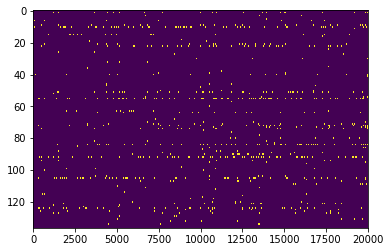

In [3]:
bin_time=0.01
maze_dataset = Maze(path="../../NoveltySessInfoMatFiles/Achilles_10252013_sessInfo.mat",
                    bin_time=bin_time,
                    normalize=False)

data = maze_dataset.generate()
plt.imshow(data, clim=[0,0.1], aspect='auto')

In [4]:
components=10
lag=100
window_size=500
model = CMF(n_components=components,
            maxlag=lag,
            alg_name='stochastic_mult',
            window_size=3000,
            n_iter_max=1000,
            tol=1e-6)
model.fit(data);

with open('maze_model_bin_size_%s_window_%s.pickle' % (int(1 / bin_time), window_size), 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump(model, f)

100%|██████████| 1000/1000 [08:30<00:00,  2.01it/s]


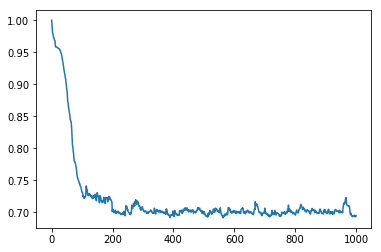

In [5]:
plt.plot(model.loss_hist)

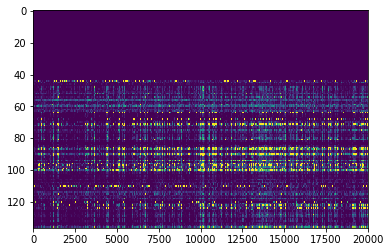

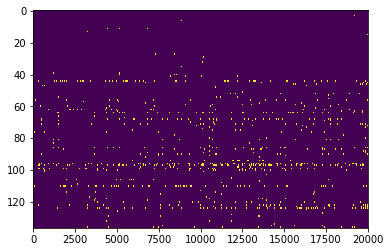

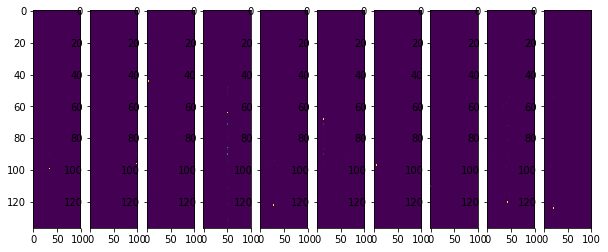

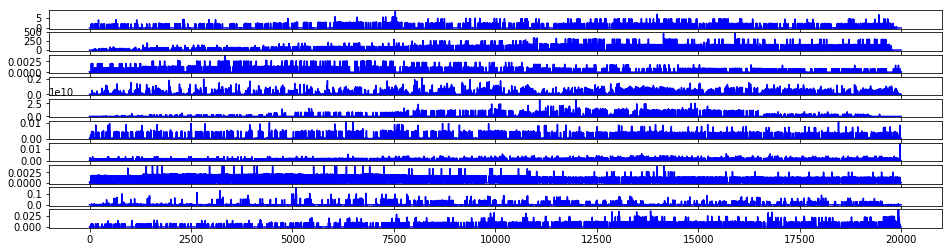

In [6]:
# Compute error, plot temporal components
#print('Score: ', model.score(data))

ordering = visual.sort_neurons(model._W)

plt.figure()
plt.imshow(model.predict()[ordering,:], aspect='auto', clim=(0, 0.1))

plt.figure()
plt.imshow(data[ordering,:], aspect='auto', clim=(0, 0.1))

plt.figure(figsize=(10,4))
for i in range(components):
    plt.subplot(1, components, i+1)
    plt.imshow(model._W[:,:,i].T[ordering,:], aspect='auto')

visual.plot_H_components(model._H)
plt.show()